# Лабораторная работа №3 "Задача классификации. Сверточная нейронная сеть"
### Воложанин В.О. ИВТ 1.3

In [1]:
import os
import random
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import gdown
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
from tensorflow.keras.preprocessing import image
from tensorflow.keras.optimizers import Adam
import time

checkdir:  cannot create extraction directory: /content/bus
           No such file or directory
Количество классов: 2, метки классов: ['Входящий', 'Выходящий']
Входящий : ['04354.jpg', '02725.jpg', '00132.jpg', '00654.jpg', '06225.jpg', '02043.jpg', '04432.jpg', '02057.jpg', '05738.jpg', '04426.jpg', '03349.jpg', '00640.jpg', '00898.jpg', '06231.jpg', '01238.jpg', '00126.jpg', '04340.jpg', '02731.jpg', '01210.jpg', '03407.jpg', '04368.jpg', '05076.jpg', '02719.jpg', '05710.jpg', '03361.jpg', '00668.jpg', '06219.jpg', '01576.jpg', '01562.jpg', '05704.jpg', '03375.jpg', '03413.jpg', '05062.jpg', '01204.jpg', '05089.jpg', '04397.jpg', '05937.jpg', '02080.jpg', '01589.jpg', '00697.jpg', '00683.jpg', '05923.jpg', '02094.jpg', '04383.jpg', '02902.jpg', '00873.jpg', '00867.jpg', '02916.jpg', '04630.jpg', '02241.jpg', '01748.jpg', '06027.jpg', '01990.jpg', '00456.jpg', '00330.jpg', '02527.jpg', '05248.jpg', '04156.jpg', '03639.jpg', '02533.jpg', '04142.jpg', '00324.jpg', '06033.jpg', '0198

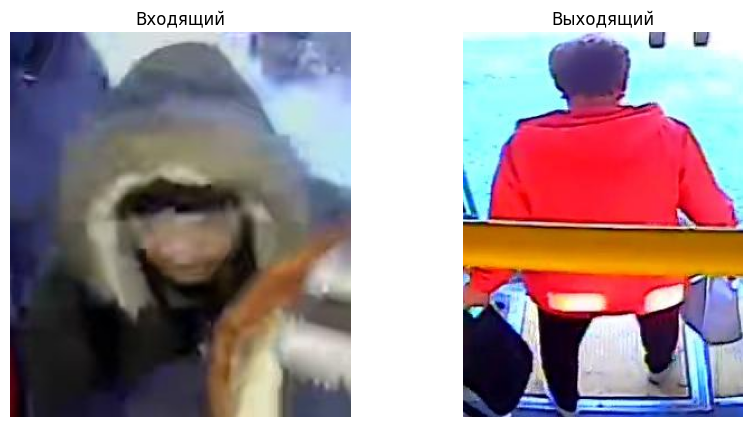

Размер класса Входящий составляет 6485 фото
Размер класса Выходящий составляет 2596 фото
Общий размер базы для обучения: 9081
Размер обучающей выборки: (7264, 128, 128, 3)
Размер проверочной выборки: (1817, 128, 128, 3)


In [2]:
gdown.download('https://storage.yandexcloud.net/algorithmic-datasets/bus.zip', None, quiet=True)
!unzip -q "bus.zip" -d /content/bus

IMAGE_PATH = 'content/bus/'

CLASS_LIST = sorted(os.listdir(IMAGE_PATH))
CLASS_COUNT = len(CLASS_LIST)
print(f'Количество классов: {CLASS_COUNT}, метки классов: {CLASS_LIST}')

for cls in CLASS_LIST:
    print(cls, ':', os.listdir(f'{IMAGE_PATH}{cls}/'))

fig, axs = plt.subplots(1, CLASS_COUNT, figsize=(10, 5))
for i in range(CLASS_COUNT):
    car_path = f'{IMAGE_PATH}{CLASS_LIST[i]}/'
    img_path = car_path + random.choice(os.listdir(car_path))
    axs[i].set_title(CLASS_LIST[i])
    axs[i].imshow(Image.open(img_path))
    axs[i].axis('off')
plt.show()

data_files = []
data_labels = []
for class_label in range(CLASS_COUNT):
    class_name = CLASS_LIST[class_label]
    class_path = IMAGE_PATH + class_name
    class_files = os.listdir(class_path)
    print(f'Размер класса {class_name} составляет {len(class_files)} фото')
    data_files += [f'{class_path}/{file_name}' for file_name in class_files]
    data_labels += [class_label] * len(class_files)
print('Общий размер базы для обучения:', len(data_labels))

IMG_SIZE = (128, 128)
def load_images(image_files, labels, img_size=IMG_SIZE):
    images = []
    for file in image_files:
        img = image.load_img(file, target_size=img_size)
        img = image.img_to_array(img)
        img = img / 255.0
        images.append(img)
    return np.array(images), np.array(labels)

X, y = load_images(data_files, data_labels)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)
print(f'Размер обучающей выборки: {X_train.shape}')
print(f'Размер проверочной выборки: {X_val.shape}')

In [3]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=(IMG_SIZE[0], IMG_SIZE[1], 3)),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    BatchNormalization(),
    
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(CLASS_COUNT, activation='softmax')
])

model.compile(optimizer=Adam(learning_rate=0.001), 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])
model.summary()

/opt/homebrew/Cellar/jupyterlab/4.1.5/libexec/lib/python3.12/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 126, 126, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 63, 63, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 63, 63, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 61, 61, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 30, 30, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 30, 30, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 28, 28, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 14, 14, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 14, 14, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 25088)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │     3,211,392 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 2)              │           258 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3,305,794 (12.61 MB)

 Trainable params: 3,305,346 (12.61 MB)

 Non-trainable params: 448 (1.75 KB)

Epoch 1/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 108s 471ms/step - accuracy: 0.7339 - loss: 2.5440 - val_accuracy: 0.7975 - val_loss: 0.4543
Epoch 2/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 119s 526ms/step - accuracy: 0.8621 - loss: 0.4600 - val_accuracy: 0.8448 - val_loss: 0.3650
Epoch 3/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 128s 562ms/step - accuracy: 0.9196 - loss: 0.1985 - val_accuracy: 0.9296 - val_loss: 0.1810
Epoch 4/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 83s 365ms/step - accuracy: 0.9285 - loss: 0.1799 - val_accuracy: 0.9152 - val_loss: 0.2672
Epoch 5/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.9379 - loss: 0.1710 - val_accuracy: 0.9461 - val_loss: 0.1498
Epoch 6/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 359ms/step - accuracy: 0.9563 - loss: 0.1201 - val_accuracy: 0.9587 - val_loss: 0.1100
Epoch 7/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 361ms/step - accuracy: 0.9498 - loss: 0.1296 - val_accuracy: 0.9477 - val_loss: 0.1764
Epoch 8/20
227/227 ━━━━━━━━━━━━━━━━━━━━ 82s 360ms/step - accuracy: 0.9593 - loss

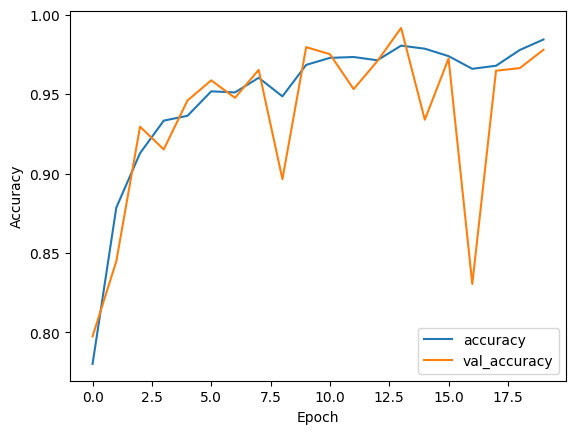

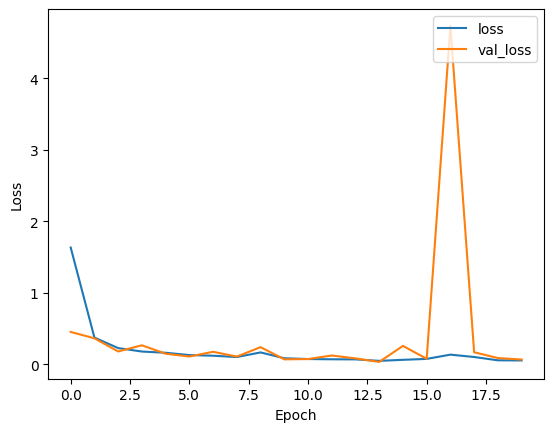

In [4]:
start_time = time.time()
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val), batch_size=32)
end_time = time.time()
print(f'Время обучения: {end_time - start_time:.2f} секунд')

val_loss, val_accuracy = model.evaluate(X_val, y_val)
print(f'Точность на проверочной выборке: {val_accuracy * 100:.2f}%')

plt.plot(history.history['accuracy'], label='accuracy')
plt.plot(history.history['val_accuracy'], label='val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')
plt.show()

plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')
plt.show()